1. Blackbox Deep Learning using FastAI

Fastai is a popular open-source library used for learning and practicing deep learning concepts.

In this colab cnn_learner is used for Image Classification, unet_learner is used for image segmentation, text_classifier_learner is used for sentiment analysis, tabular learner is used for decision tree and collab_learner is uaed for ranking. 

Install fastai and import the necessary libraries. 

In [17]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

imports from fastai

In [10]:
from fastbook import *
from fastai.vision.all import * # for computer vision models
from fastai.text.all import * # for text
from fastai.tabular.all import * # for tabular
from fastai.collab import * 
from fastai.vision import *

import numpy as np
import pandas as pd

In [11]:
from fastai.vision.all import *
%matplotlib inline

CNN_LEARNER for Image Classification

Image data is imported from URLs. cnn_learner is applied on image dataset. 

The dataset download consists of train, valid, test folders which contains the images and their labels.

In [ ]:
flowers_link = URLs.FLOWERS
flowers_link

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz'

In [ ]:
path = untar_data(flowers_link)
path.ls()

(#4) [Path('/root/.fastai/data/oxford-102-flowers/test.txt'),Path('/root/.fastai/data/oxford-102-flowers/jpg'),Path('/root/.fastai/data/oxford-102-flowers/train.txt'),Path('/root/.fastai/data/oxford-102-flowers/valid.txt')]

In [ ]:
Path.BASE_PATH = path
path.ls()

(#4) [Path('test.txt'),Path('jpg'),Path('train.txt'),Path('valid.txt')]

In [ ]:
files = get_image_files(path/'jpg')
files

(#8189) [Path('jpg/image_03899.jpg'),Path('jpg/image_03650.jpg'),Path('jpg/image_01094.jpg'),Path('jpg/image_05966.jpg'),Path('jpg/image_04654.jpg'),Path('jpg/image_06713.jpg'),Path('jpg/image_01246.jpg'),Path('jpg/image_02638.jpg'),Path('jpg/image_05853.jpg'),Path('jpg/image_00797.jpg')...]

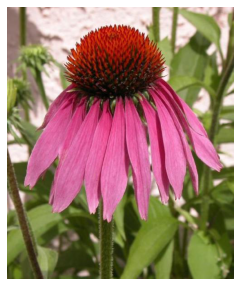

In [ ]:
img = PILImage.create(files[0])
img.show()

In [ ]:
train = pd.read_csv(path/'train.txt', header=None, sep=' ')
train.head() 

,0,1
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [ ]:
cols = ['name', 'label']
train.columns = cols
train.head()

,name,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [ ]:
# validation df
valid = pd.read_csv(path/'valid.txt', sep=" ", names= cols )
# test df
test = pd.read_csv(path/'test.txt', sep=" ", names= cols )

In [ ]:
valid.head()

,name,label
0,jpg/image_04467.jpg,89
1,jpg/image_07129.jpg,44
2,jpg/image_05166.jpg,4
3,jpg/image_07002.jpg,34
4,jpg/image_02007.jpg,79


In [ ]:
test.head()

,name,label
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45


Number of Images in train, test and valid image folders.

In [ ]:
print(f"The number of images in training set are:{len(train)}")
print(f"The number of images in validation set are:{len(valid)}")
print(f"The number of images in test set are:{len(valid)}")

The number of images in training set are:1020
The number of images in validation set are:1020
The number of images in test set are:1020


The data folders are concat to one single dataframe.

In [ ]:
df = pd.concat([train, valid, test], axis=0)
df.head()

,name,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [ ]:
df.to_csv('df.csv')

Combined data and label files

In [ ]:
labels = pd.read_csv('/content/sample_data/labels.txt', header=None, names = ['labels'])
labels['labels'] = labels['labels'].apply(lambda x: x.replace("'", ""))
labels.head()

,labels
0,pink primrose
1,hard-leaved pocket orchid
2,canterbury bells
3,sweet pea
4,english marigold


In [ ]:
labels_dict = dict(zip(list(range(len(labels))), labels['labels']))
df['class'] = df['label'].apply(lambda x: labels_dict[x])
df.head()

,name,label,class
0,jpg/image_03860.jpg,16,purple coneflower
1,jpg/image_06092.jpg,13,spear thistle
2,jpg/image_02400.jpg,42,sword lily
3,jpg/image_02852.jpg,55,bishop of llandaff
4,jpg/image_07710.jpg,96,mallow


Datablock is a generic container to quickly build datasets and dataloaders.

To build a Datablock you need to give library four things: 

1. type of input/labels

2. two functions splitter and get_items

3. get_x, get_y or a more generic list of getters that are applied to results of get_tems. 

In [ ]:
def get_x(r): return path/r['name']
def get_y(r): return r['class']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x= get_x,
                   get_y= get_y, 
                   item_tfms = Resize(224))
dls = dblock.dataloaders(df) 

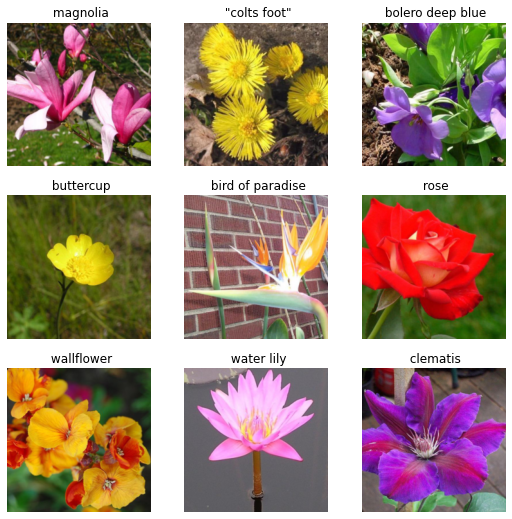

In [ ]:
dls.show_batch()

Creating CNN model using fastai library.

Convolution neural network is one of the main categories to do image recognition, image classification.

cnn_learner is used to automatically get a pretrained model with a custom head that is suitable for your data.

For training this image dataset a pre-trained CNN model is used. This approach is known as transfer learning.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

As a pre-trained model is used for training, a fine-tune method is used rather than fitting the model.

We need to choose right number of epochs to avoid overfitting. 

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.798914,0.667854,0.834453,40:50


epoch,train_loss,valid_loss,accuracy,time
0,0.589472,0.226959,0.941967,57:53
1,0.225596,0.162709,0.958461,55:28


Segmentation using unet_learner

Segmentation: Creating a model used to recognise the content of every individual pixel in an image. 

fastai has an implementation of the U-net. The key point about unet learner is the encoder. 

This model is used to find the objects in a picture (mask the objects). 


In [18]:
from fastai.tabular.all import *
from fastai.vision import *

In [27]:
!pip install ipywidgets

In [19]:
# !pip install ipywidgets
from ipywidgets import * # to upload image

In [21]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.029373,2.389702,01:10


epoch,train_loss,valid_loss,time
0,1.805090,1.558411,01:15
1,1.645808,1.489693,01:20
2,1.475656,1.292234,01:14
3,1.344223,1.235012,01:14


Visualize the image, to check the objects detected in a pic.

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


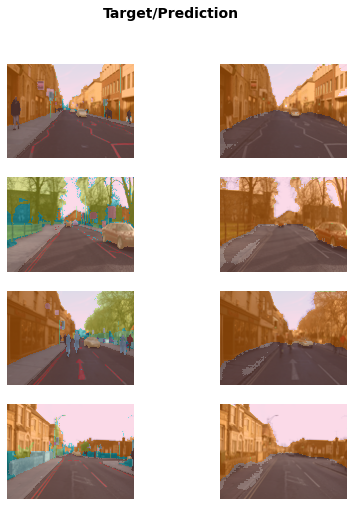

In [32]:
learn.show_results(max_n=4, figsize=(7,8))

Sentiment Analysis using text_classifier_learner

Dataset used is the movie review. 

Model is built to classify the sentiment of a movie review using text classifier learner.

In [33]:
from fastai.text.all import *

In [34]:
path = untar_data(URLs.IMDB_SAMPLE)
path

Path('/root/.fastai/data/imdb_sample')

In [35]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!",False
1,positive,"This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...",False
2,negative,"Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt li...",False
3,positive,"Name just says it all. I watched this movie with my dad when it came out and having served in Korea he had great admiration for the man. The disappointing thing about this film is that it only concentrate on a short period of the man's life - interestingly enough the man's entire life would have made such an epic bio-pic that it is staggering to imagine the cost for production.<br /><br />Some posters elude to the flawed characteristics about the man, which are cheap shots. The theme of the movie ""Duty, Honor, Country"" are not just mere words blathered from the lips of a high-brassed offic...",False
4,negative,"This movie succeeds at being one of the most unique movies you've seen. However this comes from the fact that you can't make heads or tails of this mess. It almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid. If you don't want to feel slighted you'll sit through this horrible film and develop a real sense of pity for the actors involved, they've all seen better days, but then you realize they actually got paid quite a bit of money to do this and you'll lose pity for them just like you've alr...",False


In [36]:

dls = TextDataLoaders.from_df(df, path=path, text_col='text', label_col='label', valid_col='is_valid')
learn_text = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn_text.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.664843,0.670659,0.610000,04:23


epoch,train_loss,valid_loss,accuracy,time
0,0.494488,0.626994,0.630000,11:57
1,0.453987,0.556465,0.690000,12:01
2,0.404601,0.518998,0.710000,11:57
3,0.369629,0.515708,0.750000,12:03


In [42]:
learn_text.predict('This is one of the best movie in recent time')

('positive', TensorText(1), TensorText([0.0220, 0.9780]))

Decision Tree: tabular_learner

Data is in the form of a table.  A tabular model is used to predict one column of a table based on information in other columns of the table.

Dataset used is Adults dataset. The dataset is from the census and the task is to predict whether a given adult can make $50k a year based on the attributes such as education, hors of work per week etc.

In [43]:
path = untar_data(URLs.ADULT_SAMPLE)
path

Path('/root/.fastai/data/adult_sample')

In [44]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="relationship",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'salary', 'race'], # list of categorical columns
    cont_names = ['age', 'fnlwgt', 'education-num'], # list of continuous columns
    procs = [Categorify, FillMissing, Normalize])

In [45]:
learn = tabular_learner(dls, metrics=accuracy)
# common method used for training model from scratch, set number of epoch to 5
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.739292,0.700615,0.722819,00:07
1,0.698435,0.677260,0.727580,00:05
2,0.680800,0.667727,0.734644,00:05
3,0.668419,0.663143,0.736026,00:05
4,0.658162,0.661157,0.736640,00:05


In [46]:
# Shows the prediction of relationship (instead of salary from Github notebook)
learn.show_results()

,workclass,education,marital-status,occupation,salary,race,education-num_na,age,fnlwgt,education-num,relationship,relationship_pred
0,5.0,9.0,1.0,13.0,1.0,5.0,1.0,-0.917344,-0.432083,0.358172,3.0,1.0
1,8.0,16.0,3.0,4.0,2.0,5.0,1.0,-0.550283,-0.123725,-0.031017,0.0,0.0
2,5.0,16.0,5.0,12.0,1.0,2.0,1.0,-1.210993,1.236723,-0.031017,3.0,3.0
3,5.0,6.0,3.0,13.0,1.0,5.0,1.0,1.358434,0.349288,-2.366146,0.0,0.0
4,5.0,16.0,3.0,11.0,1.0,1.0,1.0,-0.256634,-1.593139,-0.031017,0.0,0.0
5,5.0,10.0,7.0,11.0,1.0,5.0,1.0,2.753266,0.843031,1.136548,1.0,1.0
6,8.0,13.0,5.0,15.0,1.0,5.0,1.0,-1.284405,-0.861538,1.525736,3.0,3.0
7,5.0,10.0,5.0,4.0,2.0,5.0,1.0,-0.917344,-0.126276,1.136548,1.0,1.0
8,5.0,10.0,3.0,15.0,1.0,5.0,1.0,1.138198,0.067758,1.136548,0.0,0.0


Ranking using collab_learner

This learner is used to recommend products or movies that user might like. We have used movie lens dataset. This model recommends movies to the user based on their previous watching list and rating to the movies.


In [47]:
from fastai.collab import * 

In [48]:
path = untar_data(URLs.ML_SAMPLE)
path

Path('/root/.fastai/data/movie_lens_sample')

In [49]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0,10))
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,2.157639,1.853545,00:00


epoch,train_loss,valid_loss,time
0,1.665614,1.548475,00:00
1,1.211093,0.906471,00:00
2,0.844625,0.733519,00:00
3,0.713155,0.704264,00:00
4,0.676627,0.701851,00:00


In [50]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,1.0,97.0,3.5,3.615141
1,55.0,66.0,5.0,4.158470
2,65.0,33.0,3.0,3.288562
3,73.0,15.0,3.0,4.017550
4,32.0,1.0,5.0,4.756146
5,69.0,97.0,3.5,4.079166
6,79.0,88.0,5.0,4.471053
7,44.0,64.0,3.5,4.018137
8,4.0,42.0,4.5,3.479306
